Name - Yash Malviya

Designation - Data Analytics Internship @Oasis Infobyte

Task - Task 4 , Level 1, Sentiment Analysis

Date - 28/07/2024


Loading Data & Importing All Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
apps = pd.read_csv('apps.csv')

In [ ]:
user_reviews = pd.read_csv('user_reviews.csv')

In [ ]:
twitter_data = pd.read_csv('Twitter_Data.csv')

In [ ]:
print(twitter_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


In [ ]:
print(twitter_data.describe)

<bound method NDFrame.describe of                                                clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]>


In [ ]:
print(twitter_data.dtypes)

clean_text     object
category      float64
dtype: object


In [ ]:
print(twitter_data.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [ ]:
print(twitter_data.tail())

                                               clean_text  category
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0


In [ ]:
print(twitter_data.isnull().sum())

clean_text    4
category      7
dtype: int64


In [ ]:
print(twitter_data.isnull())

        clean_text  category
0            False     False
1            False     False
2            False     False
3            False     False
4            False     False
...            ...       ...
162975       False     False
162976       False     False
162977       False     False
162978       False     False
162979       False     False

[162980 rows x 2 columns]


In [ ]:
print(twitter_data.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
162975    False
162976    False
162977    False
162978    False
162979    False
Length: 162980, dtype: bool


In [ ]:
print(twitter_data.duplicated().sum())

1


In [ ]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB
None


In [ ]:
print(apps.describe)

<bound method NDFrame.describe of       Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
...          ...                                                ...   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
0          ART_AND_DESIGN     4.1   

In [ ]:
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
print(apps.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [ ]:
print(apps.tail())

      Unnamed: 0                                            App  \
9654       10836                               Sya9a Maroc - FR   
9655       10837               Fr. Mike Schmitz Audio Teachings   
9656       10838                         Parkinson Exercices FR   
9657       10839                  The SCP Foundation DB fr nn5n   
9658       10840  iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
9654               FAMILY     4.5       38   53M       5,000+  Free     0   
9655               FAMILY     5.0        4  3.6M         100+  Free     0   
9656              MEDICAL     NaN        3  9.5M       1,000+  Free     0   
9657  BOOKS_AND_REFERENCE     4.5      114   NaN       1,000+  Free     0   
9658            LIFESTYLE     4.5   398307   19M  10,000,000+  Free     0   

     Content Rating             Genres      Last Updated         Current Ver  \
9654       Everyone          Education     July 25, 20

In [ ]:
print(apps.isnull())

      Unnamed: 0    App  Category  Rating  Reviews   Size  Installs   Type  \
0          False  False     False   False    False  False     False  False   
1          False  False     False   False    False  False     False  False   
2          False  False     False   False    False  False     False  False   
3          False  False     False   False    False  False     False  False   
4          False  False     False   False    False  False     False  False   
...          ...    ...       ...     ...      ...    ...       ...    ...   
9654       False  False     False   False    False  False     False  False   
9655       False  False     False   False    False  False     False  False   
9656       False  False     False    True    False  False     False  False   
9657       False  False     False   False    False   True     False  False   
9658       False  False     False   False    False  False     False  False   

      Price  Content Rating  Genres  Last Updated  Current Ver 

In [ ]:
print(apps.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
print(user_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [ ]:
print(user_reviews.describe)

<bound method NDFrame.describe of                                App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290              

In [ ]:
print(user_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [ ]:
print(user_reviews.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [ ]:
print(user_reviews.tail())

                               App Translated_Review Sentiment  \
64290  Houzz Interior Design Ideas               NaN       NaN   
64291  Houzz Interior Design Ideas               NaN       NaN   
64292  Houzz Interior Design Ideas               NaN       NaN   
64293  Houzz Interior Design Ideas               NaN       NaN   
64294  Houzz Interior Design Ideas               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  


In [ ]:
print(user_reviews.isnull())

         App  Translated_Review  Sentiment  Sentiment_Polarity  \
0      False              False      False               False   
1      False              False      False               False   
2      False               True       True                True   
3      False              False      False               False   
4      False              False      False               False   
...      ...                ...        ...                 ...   
64290  False               True       True                True   
64291  False               True       True                True   
64292  False               True       True                True   
64293  False               True       True                True   
64294  False               True       True                True   

       Sentiment_Subjectivity  
0                       False  
1                       False  
2                        True  
3                       False  
4                       False  
...            

In [ ]:
print(user_reviews.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
print(user_reviews.isnull().sum().sum())

107457


Data Cleaning

Dropping rows with missing values in Twitter data

In [ ]:
twitter_data.dropna(inplace=True)

Filling missing values in user reviews with empty strings or appropriate values

In [ ]:
user_reviews['Translated_Review'].fillna('', inplace=True)
user_reviews['Sentiment'].fillna('Neutral', inplace=True)
user_reviews['Sentiment_Polarity'].fillna(0, inplace=True)
user_reviews['Sentiment_Subjectivity'].fillna(0, inplace=True)


Filling missing values in apps dataset with suitable replacements

In [ ]:
# Fill missing values in the 'Rating' column with the mean of the 'Rating' column
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)

# Fill missing values in the 'Size' column with "Varies with device"
apps['Size'].fillna("Varies with device", inplace=True)

# Fill missing values in the 'Type' column with 'Free'
apps['Type'].fillna('Free', inplace=True)

# Fill missing values in the 'Current Ver' column with "Unknown"
apps['Current Ver'].fillna("Unknown", inplace=True)

# Fill missing values in the 'Android Ver' column with 'Varies with device'
apps['Android Ver'].fillna('Varies with device', inplace=True)


Verifying if missing values are handled

In [ ]:
# Print the total number of missing values in the 'twitter_data' DataFrame
print(twitter_data.isnull().sum().sum())

# Print the total number of missing values in the 'user_reviews' DataFrame
print(user_reviews.isnull().sum().sum())

# Print the total number of missing values in the 'apps' DataFrame
print(apps.isnull().sum().sum())


11
0
0


Exploratory Data Analysis (EDA)

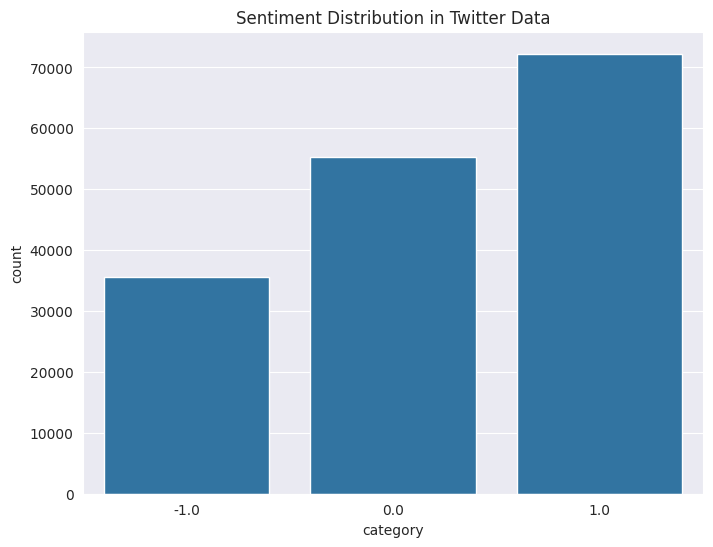

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=twitter_data)
plt.title('Sentiment Distribution in Twitter Data')
plt.show()


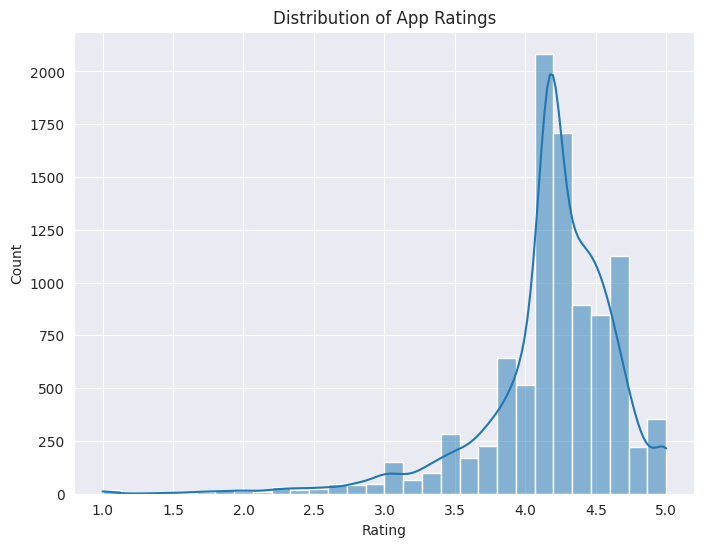

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(apps['Rating'], bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.show()


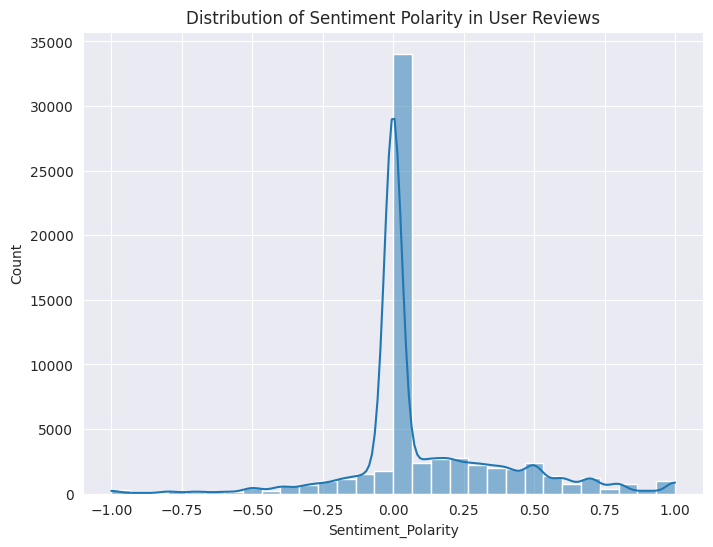

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(user_reviews['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity in User Reviews')
plt.show()


Feature engineering for Twitter data using TF-IDF Vectorizer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Sample code to load your data (replace with your actual data loading method)
# twitter_data = pd.read_csv('path_to_your_data.csv')

# Handle missing values in 'clean_text' column
twitter_data['clean_text'].fillna('', inplace=True)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Transform the text data
X_twitter = vectorizer.fit_transform(twitter_data['clean_text'])

# Extract the target variable
y_twitter = twitter_data['category']

# Split the data into training and testing sets
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(
    X_twitter, y_twitter, test_size=0.2, random_state=42
)

# Verify the splits
print(f"Training data shape: {X_train_twitter.shape}")
print(f"Testing data shape: {X_test_twitter.shape}")


Training data shape: (130384, 5000)
Testing data shape: (32596, 5000)


Splitting the Twitter data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(
    X_twitter, y_twitter, test_size=0.2, random_state=42
)


Training a Naive Bayes classifier for Twitter sentiment analysis

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Sample code to load your data (replace with your actual data loading method)
# twitter_data = pd.read_csv('path_to_your_data.csv')

# Handle missing values in 'clean_text' column
twitter_data['clean_text'].fillna('', inplace=True)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Transform the text data
X_twitter = vectorizer.fit_transform(twitter_data['clean_text'])

# Extract the target variable
y_twitter = twitter_data['category']

# Split the data into training and testing sets
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(
    X_twitter, y_twitter, test_size=0.2, random_state=42
)

# Handle missing values in the target variable
print(y_train_twitter.isnull().sum())  # Check for missing values in the target variable

# Option 1: Remove rows with missing target values
non_missing_indices = y_train_twitter.notnull()
X_train_twitter = X_train_twitter[non_missing_indices]
y_train_twitter = y_train_twitter[non_missing_indices]

# Initialize and fit the Multinomial Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_twitter, y_train_twitter)

# Optionally, you can print out the model accuracy on the test set if needed
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred_twitter = model_nb.predict(X_test_twitter)

# Calculate accuracy
accuracy = accuracy_score(y_test_twitter, y_pred_twitter)
print(f"Model Accuracy: {accuracy:.2f}")


7
Model Accuracy: 0.75


Making predictions

In [ ]:
# Predict on the test set
y_pred_twitter = model_nb.predict(X_test_twitter)


Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_twitter, y_pred_twitter)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 3304   724  3151]
 [  138  7963  2933]
 [  385   665 13333]]


In [ ]:
from sklearn.metrics import classification_report

# Compute the classification report
report = classification_report(y_test_twitter, y_pred_twitter)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.46      0.60      7179
         0.0       0.85      0.72      0.78     11034
         1.0       0.69      0.93      0.79     14383

    accuracy                           0.75     32596
   macro avg       0.80      0.70      0.72     32596
weighted avg       0.78      0.75      0.74     32596



Data Visualization of Results

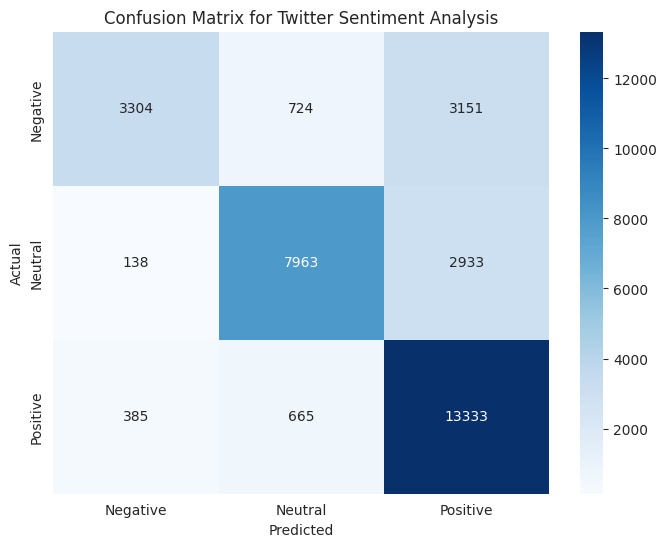

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_twitter, y_pred_twitter)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Twitter Sentiment Analysis')
plt.show()
